In [26]:
import numpy as np
import matplotlib.pyplot as plt

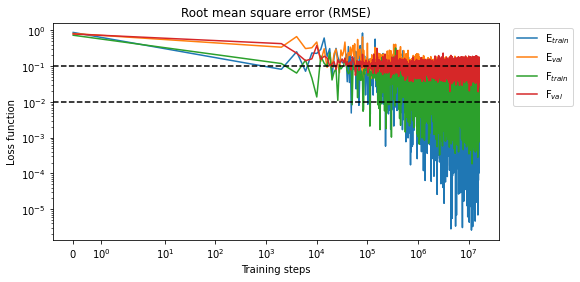

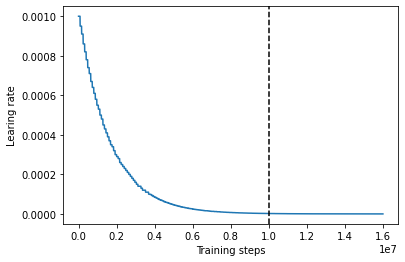

In [30]:
location = "../Results_processing/AlMgCu/se_e2_a/"
file = "../Results_processing/AlMgCu/se_e2_a/lcurve_expected.out"
data = np.genfromtxt(file, names = True)

# data = np.genfromtxt("../Results_processing/NNP-9/lcurve.out", names = True)

NNP = "AlMgCu_se_e2_a"
fig = plt.figure(figsize=(8, 4))
# for name in data.dtype.names[1:-1]:
#     plt.plot(data['step'], data[name], label=name)
plt.plot(data['step'], data['rmse_e_trn'], label='E$_{train}$')
plt.plot(data['step'], data['rmse_e_val'], label='E$_{val}$')
plt.plot(data['step'], data['rmse_f_trn'], label='F$_{train}$')
plt.plot(data['step'], data['rmse_f_val'], label='F$_{val}$')

plt.legend()
plt.xlabel('Training steps')

plt.ylabel('Loss function')
plt.xscale('symlog')
plt.yscale('log')
plt.axhline(1e-2, color='k', ls='--')
plt.axhline(1e-1, color='k', ls='--')
# plt.grid()
# plt.xlim(1000, 0.3e6)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.title('Root mean square error (RMSE)')
plt.savefig(f"{location}/RMSE_{NNP}.png", dpi=200, bbox_inches='tight', facecolor="w")
plt.show()

# Learning rate:
plt.plot(data['step'], data['lr'], label='Learning rate')
plt.axvline(1e7, color='k', ls='--')
plt.xlabel('Training steps')
plt.ylabel('Learing rate')
plt.savefig(f"{location}/Learningrate_{NNP}.png", dpi=200, bbox_inches='tight', facecolor="w")
plt.show()

In [46]:
directory = "./"
for filename in os.listdir(directory):   # Listing all files
    if filename.endswith(".txt"):   # Grab the file
        filepath = os.path.join(directory, filename)
        
        folder_name = filename[:-5]
        os.makedirs(os.path.join(directory, folder_name), exist_ok=True)
        file_AIMD = filename
        print(filepath)
            

./CoSi_1700K.txt
./CoSi_1800K.txt


In [ ]:
directory = "./"
for filename in os.listdir(directory):   # Listing all files
    if filename.endswith(".jdftxout"):   # Grab the file
        file_AIMD = os.path.join(directory, filename)
        
        folder = filename[:-10]
        os.makedirs(os.path.join(directory, folder), exist_ok=True)
   
        # AIMD Conversion:
        print("!!!Converting the AIMD data!!!")
        print('-'*50)

        # Force, energy, virial, coord:
        Etot_AIMD, Force_AIMD, Coord_AIMD, Lattice_AIMD, allatoms_AIMD, natoms, nspecies, Cframe, Uframe = all_convert(file_AIMD, frame_sep)

        # Energy correction:
        #Etot_AIMD = Etot_AIMD - Energy_atom(allatoms_AIMD)

        # type, type_map
        atom_map_AIMD = automapping(allatoms_AIMD)

        #---------------------------------------------------------------------------------------------

        # Pringin the summary information:
        print("# Summary of jdftx to DeepMD\n")
        print('-'*50)
        print("Converged frames  :", Cframe)
        print("Unconverged frames:", Uframe)
        print("No. of Elements   :", nspecies)
        print("Elements involved :", list(set(allatoms_AIMD)))
        print("All Elements      :", atom_types)
        # print("Element to int map:", mapping)
        print("No. of atoms      :", natoms)
        print("No. of frames     :", Force_AIMD.shape[0])
        print("force.raw         :", Force_AIMD.shape)
        print("coord.raw         :", Coord_AIMD.shape)
        print("energy.raw        :", Etot_AIMD.shape)
        print("box.raw           :", Lattice_AIMD.shape)
        # print("virial.raw        :", Stress_AIMD.shape)
        print('-'*50)

        with open("conversionInfo.dat", 'w') as f:
            f.write("# Summary of jdftx to DeepMD\n")
            f.write('-'*50 + '\n')
            f.write("Converged frames  :" + f'{Cframe}' + '\n')
            f.write("Unconverged frames:" + f'{Uframe}' + '\n')
            f.write("No. of Elements   :" + f'{nspecies}'+ '\n')
            f.write("Elements involved :" + f'{list(set(allatoms_AIMD))}'+ '\n')
            f.write("All Elements      :" + f'{atom_types}'+ '\n')
            f.write("No. of atoms      :" + f'{natoms}'+ '\n')
            f.write("No. of frames     :" + f'{Force_AIMD.shape[0]}'+ '\n')
            f.write("force.raw         :" + f'{Force_AIMD.shape}'+ '\n')
            f.write("coord.raw         :" + f'{Coord_AIMD.shape}'+ '\n')
            f.write("energy.raw        :" + f'{Etot_AIMD.shape}'+ '\n')
            f.write("box.raw           :" + f'{Lattice_AIMD.shape}'+ '\n')
        #     f.write("virial.raw        :" + f'{Stress_AIMD.shape}'+ '\n')
            f.write('-'*50)

        # Cleaning up
        os.system(f'mv -f *.raw conversionInfo.dat {folder}')

        # Creating the training and validation data sets:

        if os.path.exists(f'{folder}/validation_data'):
            os.system(f'rm -r {folder}/validation_data')

        if not os.path.exists(f'{folder}/validation_data'):
            os.makedirs(f'{folder}/validation_data')
            print(f"'validation_data' has been created.")

        # Copying the type.raw and type_map.raw to training_data and validation_data
        os.system(f'cp {folder}/type* {folder}/validation_data')

        n_sets = int(Etot_AIMD.shape[0] // 1)

        os.system(f'cd {folder}; /gpfs/u/home/TMGN/TMGNrjkh/scratch/DeePMD_calculation/deepmd-kit/data/raw/raw_to_set.sh {n_sets}')

        os.system(f'mv {folder}/set.* {folder}/validation_data')
        os.system(f'cp {file_AIMD} {folder}/validation_data')


In [56]:
location = ["dir1", "dir2", "dir3"]
Materials = [["a", "b", "c"], ["d", "e"], ["f", "g", "h"]]

In [58]:
index = 0
for loc in location:
    for mat in Materials[index]:
        print(f"{loc}/{mat}")
    index += 1

dir1/a
dir1/b
dir1/c
dir2/d
dir2/e
dir3/f
dir3/g
dir3/h


In [59]:
data = {
    "dir1": ["a", "b", "c"],
    "dir2": ["d", "e"],
    "dir3": ["f", "g", "h"],
}

for location, materials in data.items():
    for material in materials:
        print(f"{location}/{material}")


dir1/a
dir1/b
dir1/c
dir2/d
dir2/e
dir3/f
dir3/g
dir3/h


In [78]:
data = { "/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/SiO2/SiO2-6930/NPT_sim/NPT_liq/packmol_structure/SiO2_amorphous_jdftxout/" : ["SiO2_amorphous_1900k", 
"SiO2_amorphous_900k", 
"SiO2_amorphous_1700k_1500bar", 
"SiO2_amorphous_500k", 
"SiO2_amorphous_900k_1500bar", 
"SiO2_amorphous_500k_1500bar", 
"SiO2_amorphous_1700k", 
"SiO2_amorphous_1900k_1500bar"],
	
"/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/SiO2/SiO2-6930/NPT_sim/temp_300-3900K/SiO2_6930_NPT_jdftxout/" : 
["SiO2_6930_NPT_2900k", 
"SiO2_6930_NPT_300k", 
"SiO2_6930_NPT_1700k", 
"SiO2_6930_NPT_1900k", 
"SiO2_6930_NPT_3500k", 
"SiO2_6930_NPT_2100k", 
"SiO2_6930_NPT_700k", 
"SiO2_6930_NPT_3100k", 
"SiO2_6930_NPT_900k", 
"SiO2_6930_NPT_500k", 
"SiO2_6930_NPT_2700k", 
"SiO2_6930_NPT_2300k", 
"SiO2_6930_NPT_1500k", 
"SiO2_6930_NPT_2500k", 
"SiO2_6930_NPT_1300k", 
"SiO2_6930_NPT_3900k", 
"SiO2_6930_NPT_3700k", 
"SiO2_6930_NPT_1100k", 
"SiO2_6930_NPT_3300k"],

"/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/SiO2/SiO2-6930/NVT_sim/SiO2_6930_NVT_jdftxout/" :	
["SiO2_6930_NVT_900k", 
"SiO2_6930_NVT_2500k", 
"SiO2_6930_NVT_500k", 
"SiO2_6930_NVT_3900k", 
"SiO2_6930_NVT_2700k", 
"SiO2_6930_NVT_2100k", 
"SiO2_6930_NVT_1300k", 
"SiO2_6930_NVT_2900k", 
"SiO2_6930_NVT_300-3900K", 
"SiO2_6930_NVT_3300k", 
"SiO2_6930_NVT_2300k", 
"SiO2_6930_NVT_1900k", 
"SiO2_6930_NVT_300k", 
"SiO2_6930_NVT_1700k", 
"SiO2_6930_NVT_700k", 
"SiO2_6930_NVT_1100k", 
"SiO2_6930_NVT_3700k", 
"SiO2_6930_NVT_3100k", 
"SiO2_6930_NVT_3500k", 
"SiO2_6930_NVT_1500k"],

"/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/SiO2/SiO2-546794/NPT_sim/SiO2_546794_NPT_jdftxout/" :
["SiO2_546794_NPT_1900k", 
"SiO2_546794_NPT_3900k", 
"SiO2_546794_NPT_2300k", 
"SiO2_546794_NPT_900k", 
"SiO2_546794_NPT_300K-3900K", 
"SiO2_546794_NPT_1100k", 
"SiO2_546794_NPT_300k", 
"SiO2_546794_NPT_2700k", 
"SiO2_546794_NPT_500k", 
"SiO2_546794_NPT_3300k", 
"SiO2_546794_NPT_1300k", 
"SiO2_546794_NPT_2100k", 
"SiO2_546794_NPT_2900k", 
"SiO2_546794_NPT_2500k", 
"SiO2_546794_NPT_3700k", 
"SiO2_546794_NPT_700k", 
"SiO2_546794_NPT_3500k", 
"SiO2_546794_NPT_1700k", 
"SiO2_546794_NPT_1500k", 
"SiO2_546794_NPT_3100k"],
	
"/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/SiO2/SiO2-546794/NVT_sim/SiO2_NVT_jdftxout/" :	
["SiO2_NVT_3900k", 
 "SiO2_NVT_500k", 
 "SiO2_NVT_3700k", 
 "SiO2_NVT_2900k", 
 "SiO2_NVT_2100k", 
 "SiO2_NVT_300k", 
 "SiO2_NVT_700k", 
 "SiO2_NVT_2500k", 
 "SiO2_NVT_1700k", 
 "SiO2_NVT_900k", 
 "SiO2_NVT_2700k", 
 "SiO2_NVT_2300k", 
 "SiO2_NVT_1100k", 
 "SiO2_NVT_1500k", 
 "SiO2_NVT_1900k", 
 "SiO2_NVT_3300k", 
 "SiO2_NVT_3500k", 
 "SiO2_NVT_300K-3200K", 
 "SiO2_NVT_3100k", 
 "SiO2_NVT_1300k"],

"/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/Cobalt_silicide/CoSi_chiral/all_data/" : 
["CoSi_NPT_bulk_2300k", 
 "CoSi_NPT_bulk_2100k", 
 "CoSi_NPT_bulk_2500k_1500bar", 
 "CoSi_NPT_bulk_3200k_1500bar", 
 "CoSi_chiral_NVT_1900k", 
 "CoSi_NPT_bulk_2100k_1500bar", 
 "CoSi_NPT_bulk_300k", 
 "CoSi_chiral_NVT_300-3200K", 
 "CoSi_chiral_NVT_3200k", 
 "CoSi_NPT_bulk_2500k", 
 "CoSi_NPT_bulk_2300k_1500bar", 
 "CoSi_NPT_bulk_3200k", 
 "CoSi_NPT_bulk_1700k", 
 "CoSi_NPT_bulk_1500k", 
 "CoSi_NPT_bulk_1100k", 
 "CoSi_NPT_bulk_900k", 
 "CoSi_chiral_NVT_1500k", 
 "CoSi_chiral_NVT_1100k", 
 "CoSi_NPT_bulk_500k", 
 "CoSi_chiral_NVT_700k", 
 "CoSi_chiral_NVT_1700k", 
 "CoSi_chiral_NVT_2100k", 
 "CoSi_NPT_bulk_1900k", 
 "CoSi_NPT_bulk_700k", 
 "CoSi_chiral_NVT_900k", 
 "CoSi_NPT_bulk_1300k", 
 "CoSi_chiral_NVT_2300k", 
 "CoSi_chiral_NVT_300k", 
 "CoSi_chiral_NVT_1600k", 
 "CoSi_NPT_bulk_1600k", 
 "CoSi_chiral_NVT_500k", 
 "CoSi_chiral_NVT_1300k"],

"/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/Cobalt_silicide/CoSi_nonchiral/NPT_sim/CoSi_nc_NPT_jdftxout/" : 
["CoSi_nc_NPT_500k", 
"CoSi_nc_NPT_300k", 
"CoSi_nc_NPT_1300k", 
"CoSi_nc_NPT_2300k", 
"CoSi_nc_NPT_1500k", 
"CoSi_nc_NPT_900k", 
"CoSi_nc_NPT_2500k", 
"CoSi_nc_NPT_1100k", 
"CoSi_nc_NPT_2100k", 
"CoSi_nc_NPT_700k", 
"CoSi_nc_NPT_1900k", 
"CoSi_nc_NPT_3200k"],

"/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/Cobalt_silicide/Co2Si/NPT_sim/temp_300K-3200K/Co2Si_NPT_jdftxout/" : 
["Co2Si_NPT_1100k", 
 "Co2Si_NPT_2300k", 
 "Co2Si_NPT_1700k", 
 "Co2Si_NPT_1900k", 
 "Co2Si_NPT_1300k", 
 "Co2Si_NPT_2100k", 
 "Co2Si_NPT_2500k_1500bar", 
 "Co2Si_NPT_900k", 
 "Co2Si_NPT_300k", 
 "Co2Si_NPT_2500k", 
 "Co2Si_NPT_3200k", 
 "Co2Si_NPT_3200k_1500bar", 
 "Co2Si_NPT_2100k_1500bar", 
 "Co2Si_NPT_1500k", 
 "Co2Si_NPT_700k", 
 "Co2Si_NPT_300K_3200K", 
 "Co2Si_NPT_500k", 
 "Co2Si_NPT_2300k_1500bar"],

"/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/Cobalt_silicide/Co2Si/NVT_sim/Co2Si_NVT_jdftxout/" : 
["Co2Si_NVT_500k", 
"Co2Si_NVT_300K-3200K", 
"Co2Si_NVT_1700k", 
"Co2Si_NVT_1100k", 
"Co2Si_NVT_2300k", 
"Co2Si_NVT_300k", 
"Co2Si_NVT_3200k", 
"Co2Si_NVT_900k", 
"Co2Si_NVT_1500k", 
"Co2Si_NVT_2500k", 
"Co2Si_NVT_700k", 
"Co2Si_NVT_1900k", 
"Co2Si_NVT_2100k", 
"Co2Si_NVT_1300k"], 

"/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/Cobalt_silicide/CoSi2/NPT_sim/temp_300K-3200K/CoSi2_NPT_jdftxout/" : 
["CoSi2_NPT_1700k", 
"CoSi2_NPT_1900k", 
"CoSi2_NPT_2500k_1500bar", 
"CoSi2_NPT_2100k", 
"CoSi2_NPT_1300k", 
"CoSi2_NPT_1500k", 
"CoSi2_NPT_2300k_1500bar", 
"CoSi2_NPT_2100k_1500bar", 
"CoSi2_NPT_3200k", 
"CoSi2_NPT_300K-3200K", 
"CoSi2_NPT_2300k", 
"CoSi2_NPT_2500k", 
"CoSi2_NPT_3200k_1500bar", 
"CoSi2_NPT_900k", 
"CoSi2_NPT_500k", 
"CoSi2_NPT_700k", 
"CoSi2_NPT_300k", 
"CoSi2_NPT_1100k"],

"/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/Cobalt_silicide/CoSi2/NVT_sim/CoSi2_NVT_jdftxout/" :
["CoSi2_NVT_1100k", 
 "CoSi2_NVT_300k", 
 "CoSi2_NVT_300K-3200K", 
 "CoSi2_NVT_500k", 
 "CoSi2_NVT_2100k", 
 "CoSi2_NVT_1300k", 
 "CoSi2_NVT_700k", 
 "CoSi2_NVT_3200k", 
 "CoSi2_NVT_2300k", 
 "CoSi2_NVT_1700k", 
 "CoSi2_NVT_900k", 
 "CoSi2_NVT_1500k", 
 "CoSi2_NVT_2500k", 
 "CoSi2_NVT_1900k"],

"/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/Interface/CoSi_liq-SiO2_amp/NStressT/CoSi_liq-SiO2_amp_NPT_jdftxout/" : 

["CoSi_liq-SiO2_amp_NPT_1700k", "CoSi_liq-SiO2_amp_NPT_1900k" ],

"/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/Interface/CoSi_crys-liq/CoSi_crys_liq_NPT_jdftxout/" : 
["CoSi_crys_liq_NPT_1700k", "CoSi_crys_liq_NPT_1900k"],
	
"/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/Interface/Co2Si_crys-liq/NPT_sim_jdftxout/"  :
["NPT_sim_1900k", "NPT_sim_1700k"],

"/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/Interface/CoSi2_crys-liq/CoSi2_crys-liq_NPT_jdftxout/" : 
["CoSi2_crys-liq_NPT_1900k", "CoSi2_crys-liq_NPT_1700k"],

"/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/Cobalt_silicide/CoSi_chiral/NPT_sim/packmol_liquid/CoSi_liquid_jdftxout/" : ["CoSi_liquid_3200_new_run", "CoSi_liquid_300k"] 
       }

In [ ]:
for material in Materials:
    training_systems = dpdata.LabeledSystem(f"{location}/{material}/training_data", fmt="deepmd/npy")
    predict = training_systems.predict(MODEL)

    fig = plt.figure(figsize=(3.3, 3.3))

    plt.plot(training_systems["energies"], predict["energies"], 'o', markersize=2)

    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1])

    plt.plot(x_range, x_range, "k--", linewidth=1)
    plt.title("Training data")
    plt.xlabel("DFT energy[eV]")
    plt.ylabel("DeepMD predicted energy [eV]")
    plt.savefig(f"Train_{material}.png", dpi=200, bbox_inches='tight', facecolor="w")
    plt.plot()


In [79]:
os.makedirs("Deepmd_validation", exist_ok=True)

for location, materials in data.items():
    mat_loc = location.split("/")[-2]
    os.makedirs(mat_loc, exist_ok=True)  # Create the folder
    for material in materials:
        training_systems = dpdata.LabeledSystem(f"{location}{material}/training_data", fmt="deepmd/npy")
        validation_systems = dpdata.LabeledSystem(f"{location}{material}/validation_data", fmt="deepmd/npy")
        predict = training_systems.predict(MODEL)

        fig = plt.figure(figsize=(3.3, 3.3))

        plt.plot(training_systems["energies"], predict["energies"], 'o', markersize=2, label = "Training")
        x_range = np.linspace(plt.xlim()[0], plt.xlim()[1])
        plt.plot(x_range, x_range, "k--", linewidth=1)
        
        plt.plot(validation_systems["energies"], predict["energies"], 'o', markersize=2, label = "Validation")

        plt.xlabel("DFT energy[eV]")
        plt.ylabel("DeepMD predicted energy [eV]")
        plt.savefig(f"Train-Val_{material}.png", dpi=200, bbox_inches='tight', facecolor="w")
        plt.plot()
        os.system(f'mv Train-Val_{material}.png {mat_loc}')
    os.system(f' mv {mat_loc} Deepmd_validation')

/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/SiO2/SiO2-6930/NPT_sim/NPT_liq/packmol_structure/SiO2_amorphous_jdftxout/SiO2_amorphous_1900k
/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/SiO2/SiO2-6930/NPT_sim/NPT_liq/packmol_structure/SiO2_amorphous_jdftxout/SiO2_amorphous_900k
/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/SiO2/SiO2-6930/NPT_sim/NPT_liq/packmol_structure/SiO2_amorphous_jdftxout/SiO2_amorphous_1700k_1500bar
/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/SiO2/SiO2-6930/NPT_sim/NPT_liq/packmol_structure/SiO2_amorphous_jdftxout/SiO2_amorphous_500k
/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/SiO2/SiO2-6930/NPT_sim/NPT_liq/packmol_structure/SiO2_amorphous_jdftxout/SiO2_amorphous_900k_1500bar
/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/SiO2/SiO2-6930/NPT_sim/NPT_liq/packmol_structure/SiO2_amorphous_jdftxout/SiO2_amorphous_500k_1500

In [74]:
import os

path = "/gpfs/u/home/TMGN/TMGNrjkh/scratch/DFT_calculation/JDFT_AIMD/DFT_data/Cobalt_silicide/CoSi_chiral/NPT_sim/packmol_liquid/CoSi_liquid_jdftxout/"

# Split the path into its components
components = path.split("/")

print(components[-2])

CoSi_liquid_jdftxout


In [84]:
os.rename?

In [87]:
train_MSE = 0.123456789  # Example value
label = f"Train || MSE: {train_MSE:.3f} eV"  # Format to .2% precision
print(label)


Train || MSE: 0.123 eV


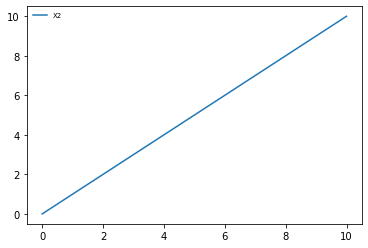

In [97]:
x = np.linspace(0, 10, 10)
plt.plot(x, x, label="X2")
plt.legend(fontsize = 'x-small', frameon=0)
plt.show()

In [103]:
import numpy as np

# Sample data (assuming it's already a list of arrays)
data = [
    np.array([-450.74984332, -449.79869604, -446.09149654]),
    np.array([-450.74984332, -449.79869604, -446.09149654]),
    np.array([-450.74984332, -449.79869604, -446.09149654]),
]

# Flatten the nested list using a list comprehension:
flattened_data = [item for sublist in data for item in sublist]

# Create a 1D NumPy array:
array_1d = np.array(flattened_data)

print(array_1d.shape)


(9,)


In [105]:
plt.close?